# Exploratory data analysis - MNIST

In [2]:
# Here, we change the path such that we can access files from the directory above and also create a path variable

import sys
sys.path.append("../") # go to parent dir
path =  sys.path[0]
root_name = "Kaggle-Knowledge-Competitions"
path = path[:path.rfind(root_name)] + root_name + "/"
print(path)

/home/charlie/Documents/Kaggle-Knowledge-Competitions/


First, read the csv into Pandas to look at the structure.

In [3]:
import pandas as pd

df = pd.read_csv(path+"data/mnist_kaggle/train.csv")
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we can convert into torch Tensors, the datatype for our model

In [4]:
import torch

labels = torch.Tensor(df['label'].values)
print(labels.shape)

imgs = df.drop(labels="label", axis=1)
imgs = torch.Tensor(imgs.values)
print(imgs.shape)

imgs = imgs.unflatten(dim=1, sizes=(28,28))
print(imgs.shape)

torch.Size([42000])
torch.Size([42000, 784])
torch.Size([42000, 28, 28])


Now visualise some data, to check if everything has worked as expected.

tensor(0.)
tensor(4.)
tensor(1.)
tensor(2.)
tensor(2.)
tensor(9.)
tensor(8.)
tensor(1.)
tensor(5.)
tensor(3.)


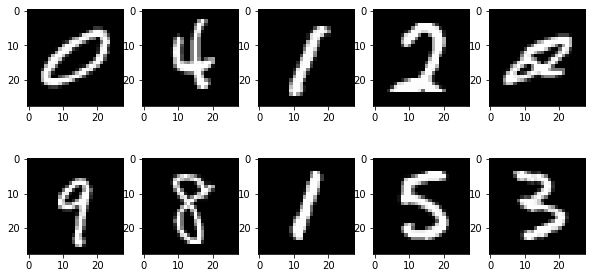

In [5]:
import matplotlib.pyplot as plt
import random

nrows=2
ncols=5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(10,5))

for i in range(nrows):
    for j in range(ncols):
        k = random.randint(0,41999)
        axs[i,j].imshow(imgs[k].detach().numpy(),cmap="gray")
        print(labels[k])


## We've written some dataset code to do all this for us, so let's test it out

In [6]:
from datasets.MNIST_kaggle import MNISTKaggle

data_train = MNISTKaggle(data_dir=path+"data/mnist_kaggle", train=True)
data_test = MNISTKaggle(data_dir=path+"data/mnist_kaggle", train=False)

tensor(0.)


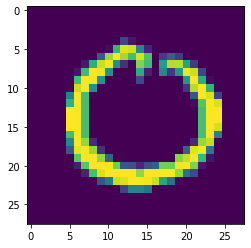

In [10]:
k = random.randint(0,41999)
plt.imshow(data_train[k][0][0].detach().numpy())
print(data_train[k][1])

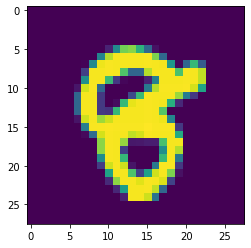

In [11]:
k = random.randint(0,41999)
plt.imshow(data_test[k][0].detach().numpy())


In [12]:
from datasets.MNIST_kaggle import MNISTKaggleModule

datamodule = MNISTKaggleModule(data_dir=path+"data/mnist_kaggle",batch_size=2)
datamodule.setup(stage="fit")
batch = next(iter(datamodule.train_dataloader()))

In [18]:
batch[0].shape

torch.Size([2, 1, 28, 28])